# Chapter3. 신경망

* 현재의 상황 정리
    * 컴퓨터가 수행하는 복잡한 처리도 퍼셉트론으로 (이론상) 구현 가능
    * 가중치를 설정하는 작업은 사람이 수동으로 해야함
        => 이것부터 해결하자

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

* 입력층, 은닉층, 출력층

<img src="./images/3-1.png" width="200" height="200"/>
[3-1]

### 3.1.2 퍼셉트론 복습

<img src="./images/3-3.png" width="200" height="200"/>
[3-3]

<img src="./images/3.1.png" width="200" height="200"/>
(3.1)

* 편향(b) : 뉴런이 얼마나 쉽게 활성화되느냐
* 가중치(w1, w2) : 각 신호의 영향력 제어

#### (3.1) 식변형하여 나타내기

<img src="./images/3.2.png" width="200" height="200"/>
(3.2)

<img src="./images/3.3.png" width="150" height="150"/>
(3.3)

### 3.1.3 활성화 함수의 등장

* 활성화 홤수 : 입력 신호의 총합을 출력 신호로 변환하는 함수

#### (3.2) 식변형하여 나타내기

<img src="./images/3.4.png" width="200" height="200"/>
(3.4)

<img src="./images/3.5.png" width="100" height="100"/>
(3.5)

위 식의 구조를 그림으로 나타내면 아래와 같다

<img src="./images/3-4.png" width="200" height="200"/>
[3-4]

### (참고)
* 단순 퍼셉트론 : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델
* 다층 퍼센트론 : 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수

<img src="./images/3.6.png" width="200" height="200"/>
(3.6)

##### (정리)
* 퍼셉트론에서는 활성화 함수로 계단 함수를 이용
* 신경망에서는 활성화 함수로 시그모이드 함수를 이용(앞으로 다룰 예정)

### 3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
step_function(3.0)

1

In [3]:
import numpy as np

In [4]:
step_function(np.array([1.0, 2.0])) ### 넘파이 배열 미지원

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
def step_function(x): ## 넘파이 배열 지원하도록 수정
    y = x > 0
    return y.astype(np.int64) ## 교재는 np.int이지만 현재 버전과의 차이 - 아래 설명 참고

In [6]:
### 인터프리터로 확인

In [7]:
import numpy as np

In [8]:
x = np.array([-1.0, 1.0, 2.0])

In [9]:
x

array([-1.,  1.,  2.])

In [10]:
y = x > 0

In [11]:
y 

array([False,  True,  True])

In [12]:
y = y.astype(np.int64) ## 교재에는 np.int이지만 현재 numpy버전(1.24.3)에서는 지원 안 하는 것 같음

In [13]:
y

array([0, 1, 1], dtype=int64)

### 3.2.3 계단 함수의 그래프

In [14]:
import numpy as np
# import matplotlib.pylab as plt # 교재에서는 pylab을 사용했다 2017년채이다보니... 현재는 pyplot을 권장하는 것 같다
import matplotlib.pyplot as plt

In [15]:
def step_function(x):
    return np.array(x > 0 ,dtype=np.int64) # int => int64

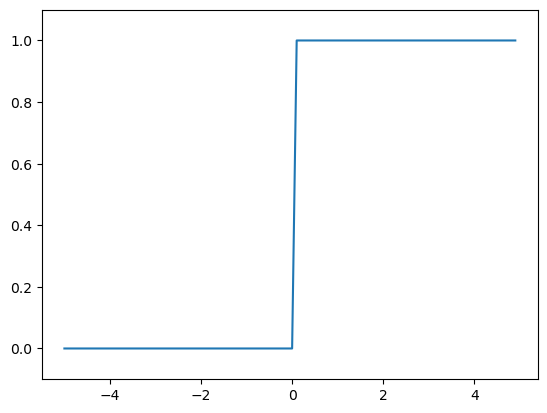

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
#### 인터프리터로 확인하기

In [19]:
x = np.array([-1.0, 1.0, 2.0])

In [20]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [21]:
### 시각화

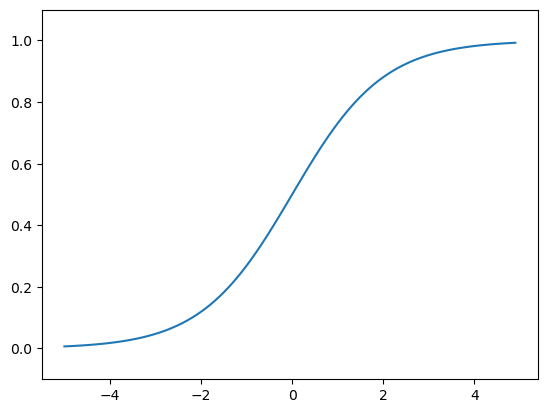

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

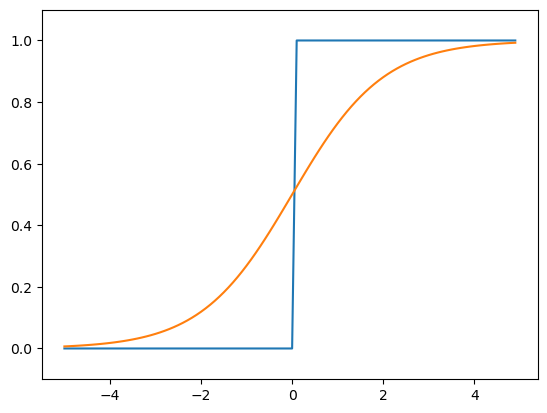

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.2.6 비선형 함수

* 신경망에서 활성화 함수를 비선형 함수로 사용해야 하는 이유
(선형함수의 문제점)
    - 선형 함수는 층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 수행할 수 있음

### 3.2.7 ReLU 함수

Rectified(정류된) Linear Unit

In [24]:
def relu(x):
    return np.maximum(0, x)

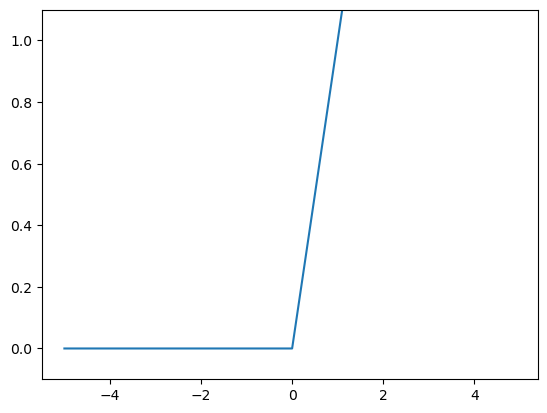

In [25]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [26]:
#### 인터프리터로 확인하기

In [27]:
import numpy as np

In [28]:
A = np.array([1,2,3,4])

In [29]:
print(A)

[1 2 3 4]


In [30]:
np.ndim(A)

1

In [31]:
A.shape

(4,)

In [32]:
A.shape[0]

4

In [33]:
B = np.array([[1,2],[3,4],[5,6]])

In [34]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [35]:
np.ndim(B)

2

In [36]:
B.shape

(3, 2)

### 3.3.2 행렬의 내적(행렬 곱)

<img src="./images/3-11.png" width="200" height="200"/>
[3-11]

In [37]:
A = np.array([[1,2],[3,4]])

In [38]:
A.shape

(2, 2)

In [39]:
B = np.array([[5,6],[7,8]])

In [40]:
B.shape

(2, 2)

In [41]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

#### (주의)
일반적으로 교환법칙은 성립하지 않는다

In [42]:
#### 크기가 다른 행렬 곱

In [43]:
A = np.array([[1,2,3],[4,5,6]])

In [44]:
A.shape

(2, 3)

In [45]:
B = np.array([[1,2], [3,4], [5,6]])

In [46]:
B.shape

(3, 2)

In [47]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [48]:
#### 계산이 안 되는 경우

In [49]:
C = np.array([[1,2],[3,4]])

In [50]:
C.shape

(2, 2)

In [51]:
A.shape

(2, 3)

In [52]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 3.3.3 신경망의 내적

<img src="./images/3-14.png" width="400" height="400"/>
[3-14]

In [53]:
#### 인터프리터로 확인하기

In [54]:
X = np.array([1,2])

In [55]:
X.shape

(2,)

In [56]:
W = np.array([[1,3,5],[2,4,6]])

In [57]:
print(W)

[[1 3 5]
 [2 4 6]]


In [58]:
W.shape

(2, 3)

In [59]:
Y = np.dot(X, W)

In [60]:
Y

array([ 5, 11, 17])

## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명

<img src="./images/3-16.png" width="400" height="400"/>
[3-16]

### 3.4.2 각 층의 신호 전달 구현하기

<img src="./images/3-17.png" width="400" height="400"/>
[3-17]

<img src="./images/3.8.png" width="200" height="200"/>
(3.8)

<img src="./images/3.9.png" width="200" height="200"/>
(3.9)

In [61]:
### 인터프리터로 구현하기

In [62]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [63]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [64]:
A1 = np.dot(X, W1) + B1

In [65]:
A1

array([0.3, 0.7, 1.1])

#### (현재 상황)

<img src="./images/3-18.png" width="400" height="400"/>
[3-18]

In [66]:
Z1 = sigmoid(A1)

In [67]:
A1

array([0.3, 0.7, 1.1])

In [68]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

<img src="./images/3-19.png" width="400" height="400"/>
[3-19]

In [69]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])

In [70]:
B2 = np.array([0.1, 0.2])

In [71]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [72]:
A2 = np.dot(Z1, W2) + B2

In [73]:
Z2 = sigmoid(A2)

In [74]:
Z2

array([0.62624937, 0.7710107 ])

<img src="./images/3-20.png" width="400" height="400"/>
[3-20]

In [75]:
def identity_function(x):
    return x

In [76]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [77]:
A3 = np.dot(Z2, W3) + B3

In [78]:
Y = identity_function(A3)

In [79]:
Y

array([0.31682708, 0.69627909])

### 출력층의 활성화 함수는?

(일반적으로)
* 회귀 : 항등함수
* 2클래스 분류 : 시그모이드 함수
* 다중 클래스 분류 : 소프트맥스 함수

### 3.4.3 구현 정리

In [80]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([[0.1, 0.2]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [81]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3= np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [82]:
network = init_network()

In [83]:
x = np.array([1.0, 0.5])

In [84]:
y = forward(network, x)

In [85]:
y

array([[0.31682708, 0.69627909]])

## 3.5 출력층 설계하기

#### (쉬어가는 시간)

회귀의 유래 : 10세기 후반 영국의 우생학자 프랜시스 골턴이 사람과 완두콩 등을 대상으로 크기를 측정
관찰 결과 키가 큰 부모의 자식은 부모보다 작고 작은 부모의 자식은 부모보다 컸음
즉 평균으로 회귀하는 경향을 발견

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

* 항등함수 : 입력을 그대로 출력

* 소프트맥스 함수

<img src="./images/3.10.png" width="150" height="150"/>
(3.10)

In [86]:
### 인터프리터로 확인하기

In [87]:
a = np.array([0.3, 2.9, 4.0])

In [88]:
exp_a = np.exp(a)

In [89]:
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [90]:
sum_exp_a = np.sum(exp_a)

In [91]:
sum_exp_a

74.1221542101633

In [92]:
y = exp_a / sum_exp_a

In [93]:
y

array([0.01821127, 0.24519181, 0.73659691])

In [94]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

In [95]:
#### 소프트맥스 함수 변형

<img src="./images/3.11.png" width="200" height="200"/>
(3.11)

In [96]:
#### 인터프리터로 확인하기

In [97]:
a = np.array([1010, 1000, 990])

In [98]:
np.exp(a) / np.sum(np.exp(a)) # 계산실패...

C:\Users\Dongyeon\AppData\Local\Temp\ipykernel_18304\66806713.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 계산실패...
C:\Users\Dongyeon\AppData\Local\Temp\ipykernel_18304\66806713.py:1: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # 계산실패...


array([nan, nan, nan])

In [99]:
c = np.max(a)

In [100]:
a - c

array([  0, -10, -20])

In [101]:
np.exp(a - c) / np.sum(np.exp(a - c)) # 계산 성공

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [102]:
def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a-C)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 소프트맥스 함수의 특징

In [103]:
#### 인터프리터로 확인하기

In [104]:
a = np.array([0.3, 2.9, 4.0])

In [105]:
y = softmax(a)

In [106]:
y

array([0.01821127, 0.24519181, 0.73659691])

In [107]:
np.sum(y)

1.0

#### (소프트맥스 함수의 특징)

* 단조증가 함수이기 때문에 소프트맥스를 적용해도 각 원소의 대소 관계는 변하지 않음
* 때문에 현업에서는 소프트맥스 함수를 생략하기도 함
* 학습 단계에서는 출력층에서 소프트맥스를 쓰고 추론 단계에서는 생략

### 3.5.4 출력층의 뉴런 수 정하기

<img src="./images/3.23.png" width="400" height="400"/>
[3-23]

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [108]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [109]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)

In [110]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [111]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [112]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [113]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)


In [114]:
img = x_train[0]

In [115]:
label = t_train[0]

In [116]:
label

5

In [117]:
print(img.shape)

(784,)


In [118]:
img = img.reshape(28, 28)

In [119]:
print(img.shape)

(28, 28)


In [120]:
img_show(img)

### 3.6.2 신경망의 추론 처리

In [121]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, t_test

In [122]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [123]:
def predict(network, x ):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [124]:
# 추론 수행 및 정확도 평가

In [125]:
import pickle

In [126]:
x, t = get_data()
network = init_network()

In [127]:
accuracy_cnt = 0
for i in range( len(x)) :
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

In [128]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


* 정규화 : 데이터를 특정 범위로 변데이터 환하는 처리
* 전처리 : 신경망의 입력 데이터에 특정 변환을 가하는 것
* 백색화 : 전체 데이터를 균일하게 분포시킴

### 3.6.3 배치 처리

In [129]:
#가중치 형상 확인

In [130]:
x, _ = get_data()

In [131]:
network = init_network()

In [132]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [133]:
x.shape

(10000, 784)

In [134]:
x[0].shape

(784,)

In [135]:
W1.shape

(784, 50)

In [136]:
W2.shape

(50, 100)

In [137]:
W3.shape

(100, 10)

<img src="./images/3-26.png" width="400" height="400"/>
[3-26]

<img src="./images/3-27.png" width="400" height="400"/>
[3-27]

In [ ]:
# 배치 처리 구현

In [150]:
x, t = get_data()

In [151]:
network = init_network()

In [152]:
batch_size = 100
accuracy_cnt = 0

In [153]:
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

In [154]:
print("Accuracy:"+ str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [155]:
# argmax 확인용

In [161]:
x = np.array([[0.1, 0.7, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])

In [162]:
np.argmax(x) # flatten해서 비교

9

In [163]:
np.argmax(x, axis = 0) # 세로축을 비교

array([3, 0, 1], dtype=int64)

In [164]:
np.argmax(x, axis = 1) # 가로축을 비교

array([1, 2, 1, 0], dtype=int64)

In [165]:
#  np.sum(p==t[i:i+batch_size]) 확인용

In [167]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

In [168]:
print(y==t)

[ True  True False  True]


In [169]:
np.sum(y==t)

3